


*   Author: Sanjana Chalavadi 
*   Subject: Machine Learning 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#importing all the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

#### Data Exploration

In [ ]:
df=pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum() #no null values present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.target.value_counts() #no class imbalance

1    526
0    499
Name: target, dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


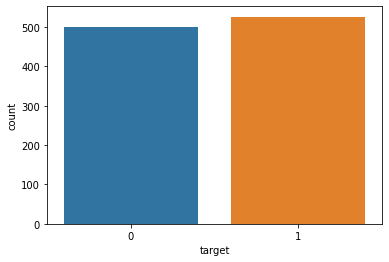

In [ ]:
#Target Distribution
sns.countplot(x="target", data=df)
plt.show()   #no class imbalance

In [ ]:
#checking the percent of people having no disease 
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients that don't have heart disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of patients that have heart disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of patients that don't have heart disease: 48.68%
Percentage of patients that have heart disease: 51.32%


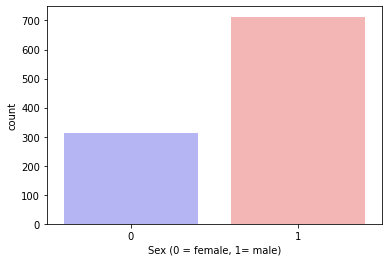

In [ ]:
#Gender distribution
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
#checking the percent of gender
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of females: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of males: {:.2f}%".format((countMale / (len(df.sex))*100)))
#looks like males are more than twice the number of females

Percentage of females: 30.44%
Percentage of males: 69.56%


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


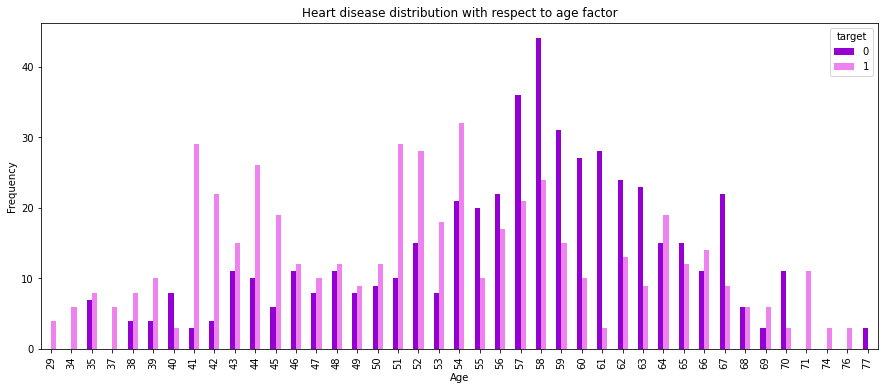

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6),color=['darkviolet','violet' ])
plt.title('Heart disease distribution with respect to age factor')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()
#54 age seems like the most common age for having heart disease followed by 51,52 and 41

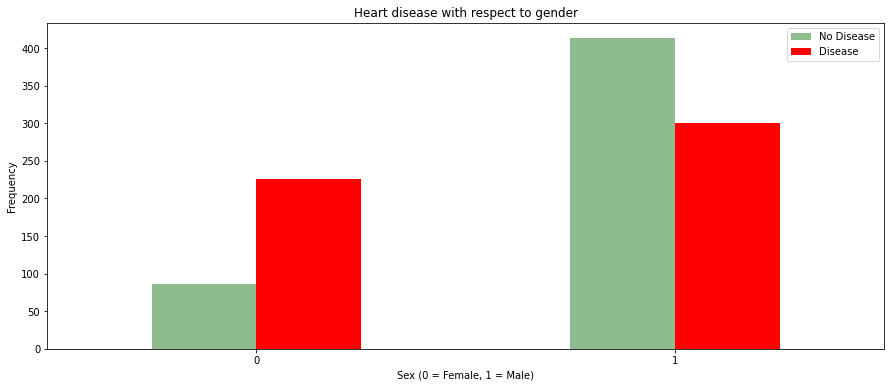

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['darkseagreen','red' ])
plt.title('Heart disease with respect to gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()
#Looks like majority of the patients having disease are Males

In [ ]:
type(df['target'])

pandas.core.series.Series

In [ ]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Heart disease with respect to gender')

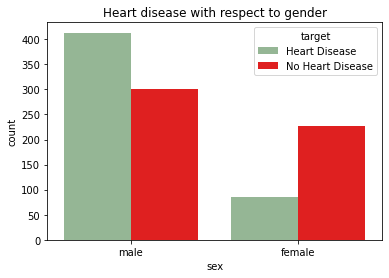

In [ ]:
sns.countplot(data= df2, x='sex',hue='target', palette=['darkseagreen','red' ])
plt.title('Heart disease with respect to gender')

In [ ]:
#Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic
def chng3(cp):
    if cp == 0:
        return 'asymptomatic'
    elif cp == 1:
        return 'atypical angina'
    elif cp == 2:
        return 'non-anginal pain'
    else:
        return 'typical'
df2['cp'] = df2['cp'].apply(chng3)

Text(0.5, 1.0, 'Chest pain type with respect to target')

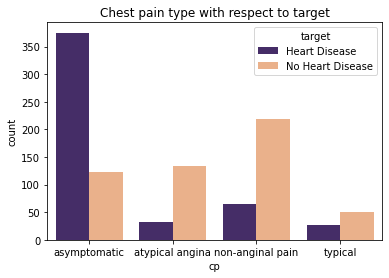

In [ ]:
sns.countplot(data= df2, x='cp',hue='target',palette=['#432371',"#FAAE7B"])
plt.title('Chest pain type with respect to target')
#most of the heart disease patients have asymptomatic chest pain which also means that the symptoms are silent
#so in case the patient has heart disease, they wouldn lack the intensity of a classic heart attack such as extreme 
#chest pain and pressue, stabbing pain in the arm, neck, or jaw, sudden shortness of breath;sweating, and dizziness
#lets check other factors
#The only way to tell If you had asymptomatic attack is by an electrocardiogram or echocardiogram.
#These tests can reveal changes that signal a heart attack.

Text(0.5, 1.0, 'Chest pain type with respect to target')

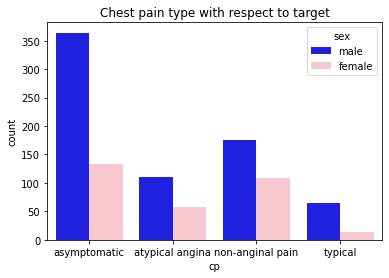

In [ ]:
#lets check the same with respect to gender
sns.countplot(data= df2, x='cp',hue='sex',palette=['blue',"pink"])
plt.title('Chest pain type with respect to target')
#looks like males have more asymptomatic chest pain when compared to females
#females mostly exhibit aysymptomatic and non-anginal chest pains. Non anginal pains can 
#actually exhibit pain symptoms behind the breast bone 

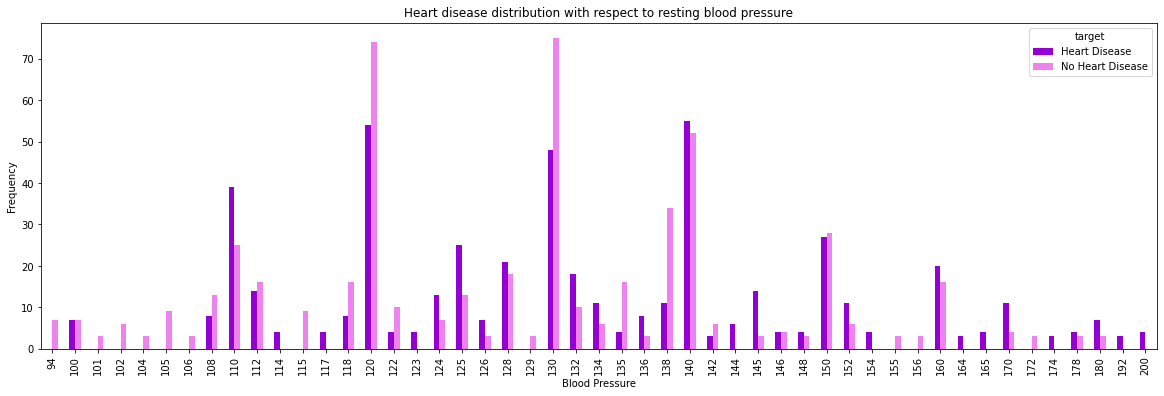

In [ ]:
pd.crosstab(df2.trestbps,df2.target).plot(kind="bar",figsize=(20,6),color=['darkviolet','violet' ])
plt.title('Heart disease distribution with respect to resting blood pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()
#bp of 120, 130 and 140 seem to contribute to heart diseases. Its hard to say because this is resting blood pressure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation of resting blood pressure with target')

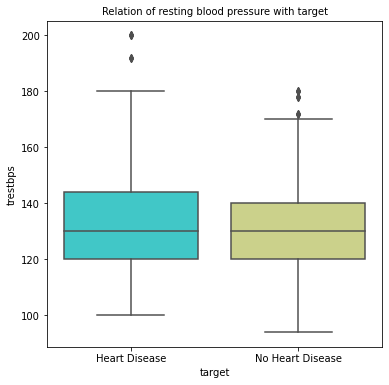

In [ ]:
#lets use a better visualization
plt.figure(figsize=(6,6))
sns.boxplot(df2['target'], df2['trestbps'], palette = 'rainbow')
plt.title('Relation of resting blood pressure with target', fontsize = 10)
#The plot clearly suggests that the patients who are most likely to not suffer 
#from the disease have a slighly lower blood pressure than the patients who have heart diseases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cholestrol with respect to target')

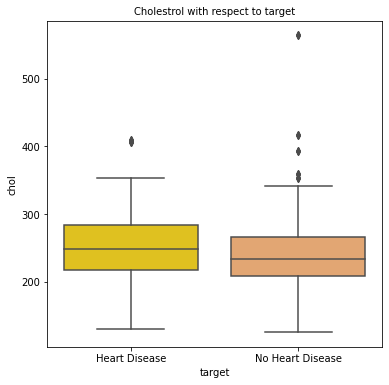

In [ ]:
#lets see how cholestrol impacts
plt.figure(figsize=(6,6))
sns.boxplot(df2['target'], df2['chol'], palette=['gold',"sandybrown"])
plt.title('Cholestrol with respect to target', fontsize = 10)

In [ ]:
#In general, low LDL levels and high HDL cholesterol levels are good for heart health.
#a healthy heart has a total cholestrol levels of less than 200mg/dl
#whereas at risk is considered as 200-239 and dangeours is considered as 240 and higher
#source: https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean
def chng4(chol):
    if chol < 200:
        return 'Heart healthy '
    elif chol >= 200 and chol <= 239 :
        return 'At-risk'
    else:
        return 'Dangerous'

df2['chol'] = df2['chol'].apply(chng4)


Text(0.5, 1.0, 'Cholestrol with respect to target')

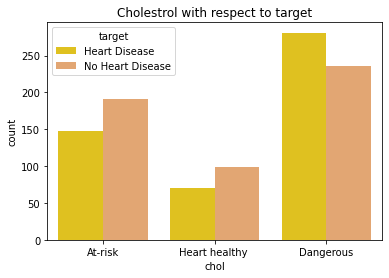

In [ ]:
#lets check the same with respect to gender
sns.countplot(data= df2, x='chol',hue='target',palette=['gold',"sandybrown"])
plt.title('Cholestrol with respect to target')
#most of the heart disease patients have dangerous levels of cholestrol followed by at-risk
#looks like this is one of the significant factors in determing a heart disease

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution of Heart Disease Patients\n')

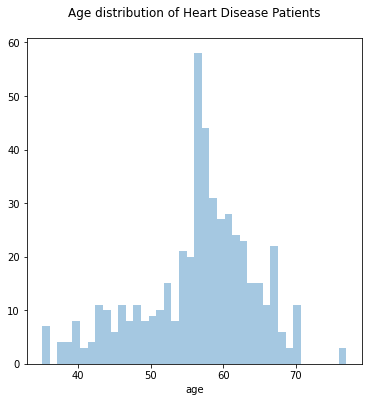

In [ ]:
#lets check in depth with respect to age
plt.figure(figsize=(6,6))
sns.distplot(df2[df2['target']=='Heart Disease']['age'],kde=False,bins=40)
plt.title('Age distribution of Heart Disease Patients\n')
#Heart Disease seems like a very common disease in the age above 60 
#and common among adults which belong to the age group of 41 to 60. 
#But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

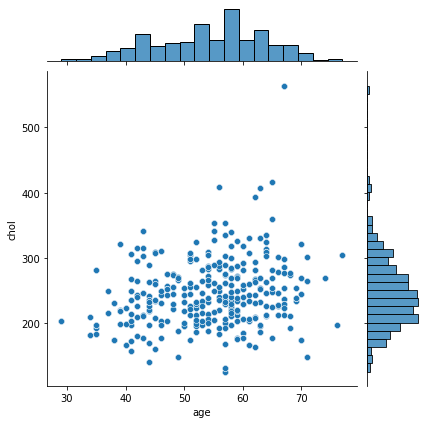

In [ ]:
sns.jointplot(data=df, x="age", y="chol")

Text(0.5, 1.0, 'Fasting blood sugar with respect to target')

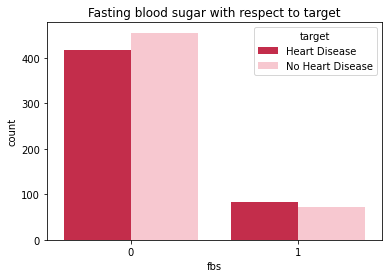

In [ ]:
#fasting blood sugar
sns.countplot(data= df2, x='fbs',hue='target',palette=['crimson',"pink"])
plt.title('Fasting blood sugar with respect to target')
#looks like blood sugar level for most of the heart disease patients is less than 120
#>120 is 1 otherwise 0

In [ ]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,asymptomatic,125,At-risk,0,1,168,0,1.0,2,2,3,Heart Disease
1,53,male,asymptomatic,140,At-risk,1,0,155,1,3.1,0,0,3,Heart Disease
2,70,male,asymptomatic,145,Heart healthy,0,1,125,1,2.6,0,0,3,Heart Disease
3,61,male,asymptomatic,148,At-risk,0,1,161,0,0.0,2,1,3,Heart Disease
4,62,female,asymptomatic,138,Dangerous,1,1,106,0,1.9,1,3,2,Heart Disease


Text(0.5, 1.0, 'Resting ECG with respect to Target')

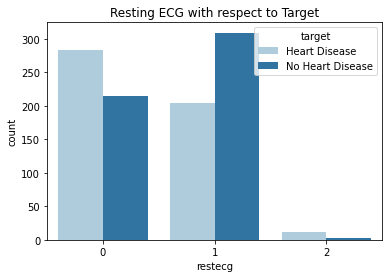

In [ ]:
#lets check with respect to resting ecg
#Resting 12-lead electrocardiography (ECG) is a non-invasive test that can detect abnormalities 
#including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks
#In our case, level 0 means normal, level 1 means ST-T wave abnormality and level 2 means definite left ventricular hypertrophy
sns.set_palette("Paired")
sns.countplot(data= df2, x='restecg',hue='target')
plt.title('Resting ECG with respect to Target')
#looks like most of the heart disease patients have either normal ECG or some ST-T wave abnormality
#so it seems like ECG is not the sole factor in estimating if a person has heart disease

Text(0.5, 1.0, 'Exercise induced angina with respect to ST depression')

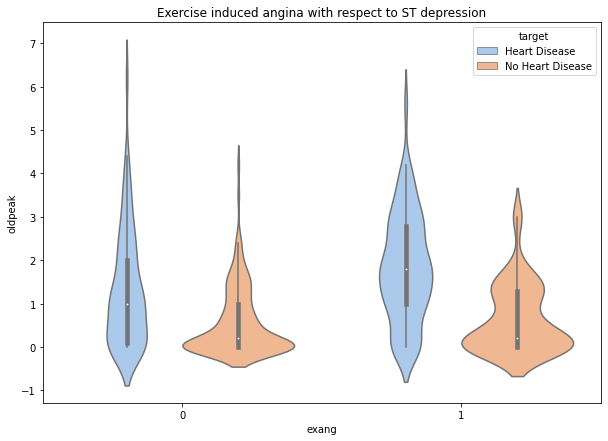

In [ ]:
#checking with respect to exercise induced angina with respect to ST depression induced by exercise relative to rest
#Exercise-induced angina (AP) is a common complaint of cardiac patients, particularly when exercising in the cold.
plt.figure(figsize=(10,7))
sns.set_palette("pastel")
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target').set_title("Exercise induced angina with respect to ST depression")
#if you notice the graph, you can see that if exericse induced angina is present and if old peak is greater than zero, then there is a possible case of a heart disease


Text(0.5, 1.0, 'Exercise induced angina with respect to gender')

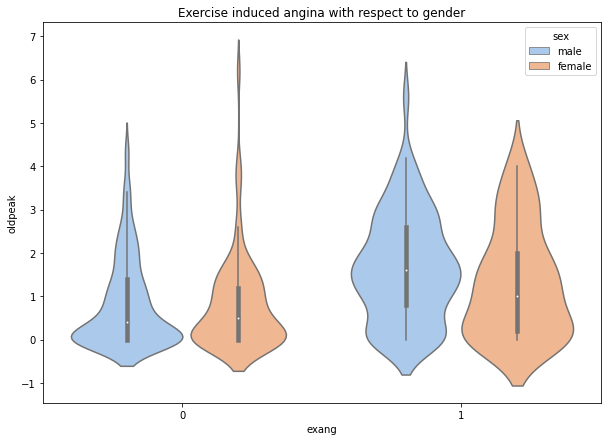

In [ ]:
#checking with respect to gender
#looks like its more for males 
plt.figure(figsize=(10,7))
sns.set_palette("pastel")
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='sex').set_title("Exercise induced angina with respect to gender")

Text(0.5, 1.0, 'Heart rate with respect to exercise segment')

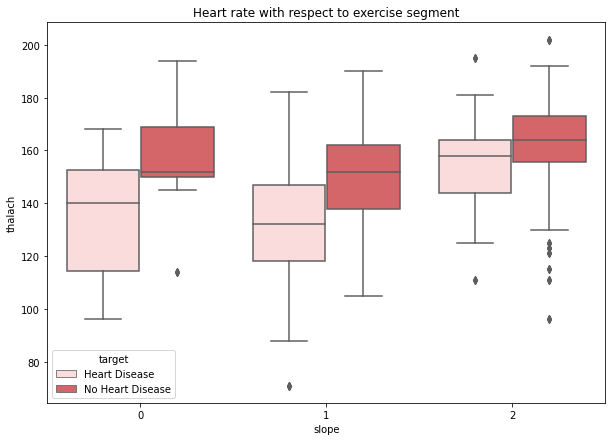

In [ ]:
#checking exercise segment 
#thalach is maximum heart rate
#the slope of the peak exericse ST segment, 0:unsloping, 1: flat, 2: downsloping
#ST segment depression (horizontal or downsloping) is the most reliable indicator of exercise-induced ischaemia
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target', palette =['#FFD7D7','#E75258']).set_title("Heart rate with respect to exercise segment")
#looks like for most of the heart disease patients, the ST segment is either flat or downsloping
#need to check slope with respect to exang
#its a good way to diagnose heart diseases

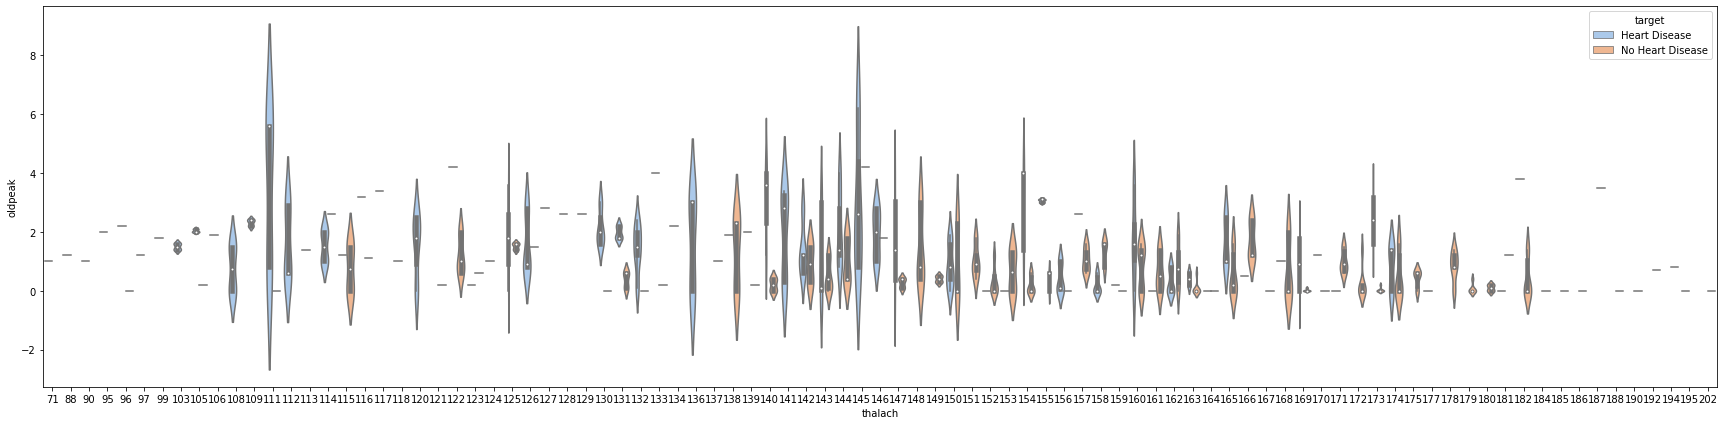

In [ ]:
#checking when its relative to rest
plt.figure(figsize=(30,7))
sns.color_palette("bright")
sns.violinplot(data=df2,x='thalach',y='oldpeak',hue='target')

In [ ]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,asymptomatic,125,At-risk,0,1,168,0,1.0,2,2,3,Heart Disease
1,53,male,asymptomatic,140,At-risk,1,0,155,1,3.1,0,0,3,Heart Disease
2,70,male,asymptomatic,145,Heart healthy,0,1,125,1,2.6,0,0,3,Heart Disease
3,61,male,asymptomatic,148,At-risk,0,1,161,0,0.0,2,1,3,Heart Disease
4,62,female,asymptomatic,138,Dangerous,1,1,106,0,1.9,1,3,2,Heart Disease


Text(0.5, 1.0, 'Thalassemia in target')

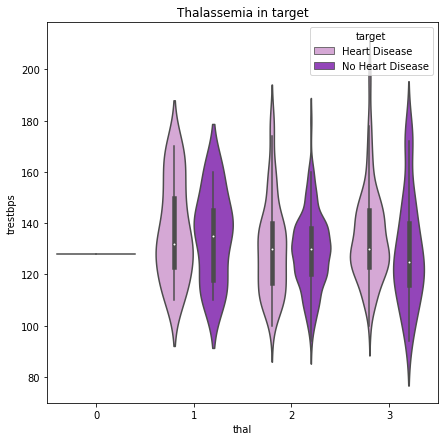

In [ ]:
#Thalassemia is an inherited blood disorder that causes your body
#to have less hemoglobin than normal. Hemoglobin enables red blood cells
#to carry oxygen. Thalassemia can cause anemia leaving the patient fatiuged.
#thalassema major leads to heart failure and liver problems. 
#lets check how thalassemia is in relation to target

#thal
#Results of the blood flow observed via the radioactive dye.
 
#Value 0: NULL (dropped from the dataset previously)
#Value 1: fixed defect (no blood flow in some part of the heart)
#Value 2: normal blood flow
#Value 3: reversible defect (a blood flow is observed but it is not normal)
#This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.

plt.figure(figsize=(7,7))
sns.violinplot(data=df2,x='thal',y='trestbps',hue='target',palette=['plum','darkorchid']).set_title("Thalassemia in target")
#So patients with thalasemmia of reversible defect have blood pressure(notice >120) which could be possible reasons for heart disease
#and notice the one in fixed defect too (value 1), they seem the have bp higher than 120 as well

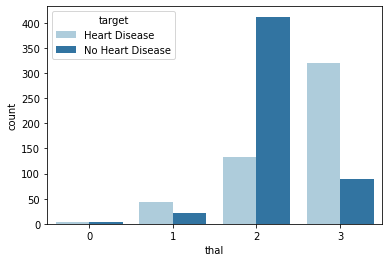

In [ ]:
sns.set_palette("Paired")
sns.countplot(data= df2, x='thal',hue='target') # abnormal levels of thalassemia indicate heart disease

In [ ]:
#Backpropogation

In [ ]:
#in order to start, we need to have some numbers to work which are the initial weights, the biases, and training inputs/outputs
#backpropogation is an algorithm for determining how a single training example would like to nudge the weights and biases in terms of 
#relative proportions to those changes that cost the most rapid decrease to the costs

#when training an artificial neural netwrok, we pass data into our model. the way this data flows through the model is via forward propogation
#where we are repeatedly calculating the weight sum of the previous layers activation output with the corresponding weights and then passing this sum
#to the next layers activation function. We do this until we reach the output layer and at this point we calculate loss on our output and then 
#gradient descent works to minimize this loss
#gradient descent does this minimization process by first calculating the gradient of the loss function with respect to the weights and then updating 
#the weights in the network accordingly. To do the actual calculation, gradient descent uses backpropogation

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df3 = df.copy()

In [ ]:
#creating dummy variables
chest_pain=pd.get_dummies(df3['cp'],prefix='cp',drop_first=True)
df3=pd.concat([df3,chest_pain],axis=1)
df3.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df3['slope'],prefix='slope')
th=pd.get_dummies(df3['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df3['restecg'],prefix='restecg')
frames=[df3,sp,th,rest_ecg]
df3=pd.concat(frames,axis=1)
df3.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [ ]:
df3.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,1,0,0,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,1,0,0,0,0,0,1,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
x=df3.columns.get_loc('target')
x

9

Creating training and testing test

In [ ]:
#X = df.iloc[:,:13].values
#y = df["target"].values

In [ ]:
X = df3.drop(['target'], axis = 1)
y = df3.target.values

In [ ]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,1,0,0,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,1,0,0,0,0,0,1,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,0,1,...,0,0,1,0,0,1,0,0,1,0
1021,60,1,125,258,0,141,1,2.8,1,0,...,0,1,0,0,0,0,1,1,0,0
1022,47,1,110,275,0,118,1,1.0,1,0,...,0,1,0,0,0,1,0,1,0,0
1023,50,0,110,254,0,159,0,0.0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the data into train and test
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#building the model
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 22, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
#fitting the model
classifier.fit(X_train , y_train , batch_size = 10 ,epochs = 100  )

In [ ]:
#performing prediction and re scaling
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [ ]:
print(classification_report(y_test,y_pred.round()))

In [ ]:
# Confusion Matrix visualization Function
def plotConfusionMatrixFunction(ClassifierLabel,classifier,X_train,y_train):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
    fig.suptitle(ClassifierLabel,fontsize=20)
    print()
    disp = plot_confusion_matrix(classifier, X_train, y_train, ax = axes[0], display_labels=["Does not have", "Has Heart Disease"],cmap=plt.cm.YlGnBu) 
    disp.ax_.set_title('Confusion Matrix for training data',fontsize = 15)

    disp = plot_confusion_matrix(classifier, X_test, y_test, ax = axes[1], display_labels=["Does not have", "Has Heart Disease"],cmap=plt.cm.YlGnBu) 
    disp.ax_.set_title('Confusion Matrix for testing data',fontsize = 15)

**Building and training a network:**
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
accuracies={}
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

In [ ]:
##################other way ###############################

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Machine:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, svc_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Does not have", "Has Heart Disease"])
cm_display.plot()
plt.show()


In [ ]:
plotConfusionMatrixFunction('Confusion Matrix using SVM ', svc,X_train,y_train)

In [ ]:
#Optimize Parameters with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [ ]:
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix


In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [0.1,0.001, 0.0001], 
   'kernel': ['rbf']},
 ] #kernel - rbf

optimal_params = GridSearchCV (
#will check all possible parameters for us 
        SVC(), 
        param_grid,
        cv=5,
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
)


optimal_params.fit(X_train, y_train) #fit

print(optimal_params.best_params_) #print the best parameters

In [ ]:
#Building, Evaluating, Drawing, and Interpreting the Final Support Vector Machine
clf_svm = SVC(random_state=42, C=10, gamma=0.1) #putting the parameters values from the result of optimisation
clf_svm.fit(X_train, y_train)

In [ ]:
plotConfusionMatrixFunction('Confusion Matrix using SVM with optimization ', clf_svm,X_train,y_train)

In [ ]:
#Drawing the support vector classifier

In [ ]:
len(df.columns)

In [ ]:
pca = PCA() # By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation=45)
plt.title('Scree Plot')
plt.show()
#will choose the top 2 PCA for the 2D plotting 

In [ ]:
import matplotlib.colors as colors


In [ ]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now we fittthe SVM to the x and y-axis coordinates
## of the data after PCA dimension reduction...
clf_svm.fit(np.column_stack((pc1, pc2)), y_train) #fitting the PCs to the SVM

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel()))) ## Array of zeros and ones
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)  #will allow us to draw support vector boundary -- and color code it

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['teal', 'red'])
## now darw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Plane using the PCA transformed features(using 2PCs)')
# plt.savefig('svm.png')
plt.show()

In [ ]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]
pc3 =  X_train_pca[:,2]

## Now we fittthe SVM to the x and y-axis coordinates
## of the data after PCA dimension reduction...
clf_svm.fit(np.column_stack((pc1, pc2,pc3)), y_train) #fitting the PCs to the SVM

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

z_min = pc3.min() - 1
z_max = pc3.max() + 1

xx, yy, zz= np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1),
                     np.arange(start=z_min, stop=z_max, step=0.1))
## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel(),zz.ravel()))) ## Array of zeros and ones
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection ="3d")
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
#ax.contourf(xx, yy, zz, Z, alpha=0.1)  #will allow us to draw support vector boundary -- and color code it

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['teal', 'red'])
## now darw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
scatter = ax.scatter3D(pc1, pc2, pc3, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')
ax.set_title('Surface using 3PCs')
# plt.savefig('svm.png')
plt.show()

**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_nb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier_nb.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

In [ ]:
plotConfusionMatrixFunction('Confusion Matrix for Naive Bayes Classifier',classifier_nb,X_train,y_train)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
def plotClassifierGraph(classifier, X_train, X_test):
    pca = PCA()
    X_train_pca = pca.fit_transform(X_train)

    pc1 = X_train_pca[:, 0]
    pc2 = X_train_pca[:, 1]

    # # pc1 contains the x-axis coordinates of the data after PCA
    # # pc2 contains the y-axis coordinates of the data after PCA

    # # Now we fittthe SVM to the x and y-axis coordinates
    # # of the data after PCA dimension reduction...

    classifier.fit(np.column_stack((pc1, pc2)), y_train)

    # # Now create a matrix of points that we can use to show
    # # the decision regions.
    # # The matrix will be a little bit larger than the
    # # transformed PCA points so that we can plot all of
    # # the PCA points on it without them being on the edge

    x_min = pc1.min() - 1
    x_max = pc1.max() + 1

    y_min = pc2.min() - 1
    y_max = pc2.max() + 1

    (xx, yy) = np.meshgrid(np.arange(start=x_min, stop=x_max,
                           step=0.1), np.arange(start=y_min,
                           stop=y_max, step=0.1))

    # # now we will classify every point in that
    # # matrix with the SVM. Points on one side of the
    # # classification boundary will get 0, and points on the other
    # # side will get 1.

    Z = classifier.predict(np.column_stack((xx.ravel(), yy.ravel())))

    # # Right now, Z is just a long array of lots of 0s and 1s, which
    # # reflect how each point in the mesh was classified.
    # # We use reshape() so that each classification (0 or 1) corresponds
    # # to a specific point in the matrix.

    Z = Z.reshape(xx.shape)

    (fig, ax) = plt.subplots(figsize=(10, 10))

    # # now we will use contourf() to draw a filled contour plot
    # # using the matrix values and classifications.
    # # The contours will be filled according to the
    # # predicted classifications (0s and 1s) in Z

    ax.contourf(xx, yy, Z, cmap=plt.cm.winter, alpha=0.1)
    ax.xaxis.grid(True, zorder=0)
    ax.yaxis.grid(True, zorder=0)

    # # now create custom colors for the actual data points

    cmap = colors.ListedColormap(['teal', 'red'])

    # # now darw the actual data points - these will
    # # be colored by their known (not predcited) classifications
    # # NOTE: setting alpha=0.7 lets us see if we are covering up a point

    scatter = ax.scatter(  # # 'k' = black
        pc1,
        pc2,
        c=y_train,
        cmap=cmap,
        s=120,
        edgecolors='k',
        alpha=0.5,
        )

    # # now create a legend

    legend = ax.legend(scatter.legend_elements()[0],
                       scatter.legend_elements()[1], loc='upper right')
    legend.get_texts()[0].set_text('No Heart Disease')
    legend.get_texts()[1].set_text('Yes Heart Disease')

    # # now add axis labels and titles

    ax.set_ylabel('Principal Component - 2')
    ax.set_xlabel('Principal Component - 1')
    ax.set_title('Decison surface using the PCA transformed using Naive Bayes Classifier'
                 )

    # plt.savefig('svm.png')

    plt.show()

In [ ]:
plotClassifierGraph(classifier_nb, X_train,X_test)

**Gaussian Mixture Model**

In [ ]:
gmm_dataset=pd.read_csv('USArrests.csv')
gmm_dataset.head(5)
gmm_dataset.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)

In [ ]:
gmm_dataset.head()

In [ ]:
gmm_dataset.isnull().sum() #no null values

In [ ]:
gmm_dataset.describe().T

In [ ]:
gmm_dataset.shape

In [ ]:
gmm_dataset.info()

In [ ]:
gmm_dataset.hist(layout=(5,4), figsize=(15,10))
#gmm_dataset.plot(subplots=True, layout=(2,2))

In [ ]:
gmm_dataset = gmm_dataset.drop('Country', axis = 1) 
gmm_dataset.head

In [ ]:
cormat = gmm_dataset.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

In [ ]:

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(gmm_dataset) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)

In [ ]:
#gmm = GaussianMixture(n_components = 3) 
#gmm.fit(X_principal)

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
gmm = GMM(3).fit(X_principal)
labels = gmm.predict(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=40, cmap='viridis'); #use this 

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X_principal['P1'], X_principal['P2'], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
#gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X_principal)
#if you can notice, GMM is more flexible when compared to kmeans allowing us to generate better fitting distributions.
#however in this case, 3 does not seem right but because some data points appear outside the cluster

In [ ]:
gmm_4 = GMM(n_components=4).fit(X_principal)
labels = gmm_4.predict(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=40, cmap='viridis');

In [ ]:
plot_gmm(gmm_4, X_principal)

In [ ]:
########checking number of K####### https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained/notebook
#https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f follow this carefully to finish GMM

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]


In [ ]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Plot", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")  #Highest when K  = 5

In [ ]:
gmm_5 = GMM(n_components=5).fit(X_principal)
labels = gmm_5.predict(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, s=40, cmap='viridis');

In [ ]:
plot_gmm(gmm_5, X_principal)

In [ ]:
from scipy.stats import multivariate_normal as mvn

Distance between GMMs

In [ ]:
#Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [ ]:
n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X_principal, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

In [ ]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distance")
plt.show()


Bayesian information criterion (BIC)

This criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have. In order to avoid overfitting, this technique penalizes models with big number of clusters

In [ ]:

n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        
        tmp_bic.append(gmm.bic(X_principal))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.legend()

In [ ]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [ ]:
##############################################################################################################

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")



# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

In [ ]:
centers

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

### **Random Forests**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isna().sum() # missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [ ]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

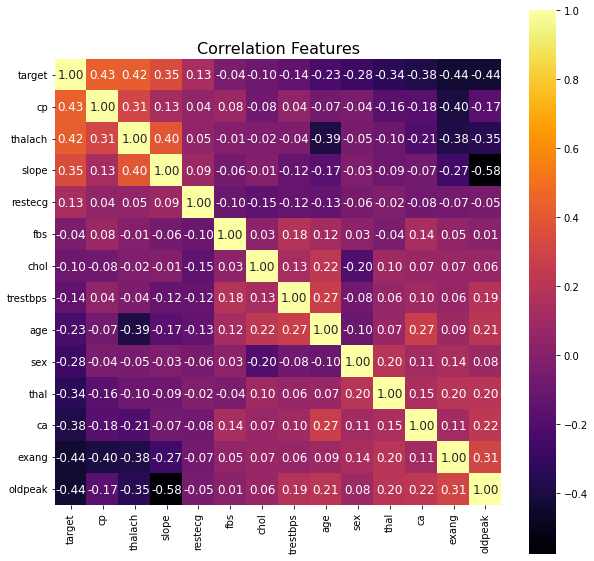

In [ ]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':12})
plt.title('Correlation Features', size=16)
plt.show()

In [ ]:
categorial_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

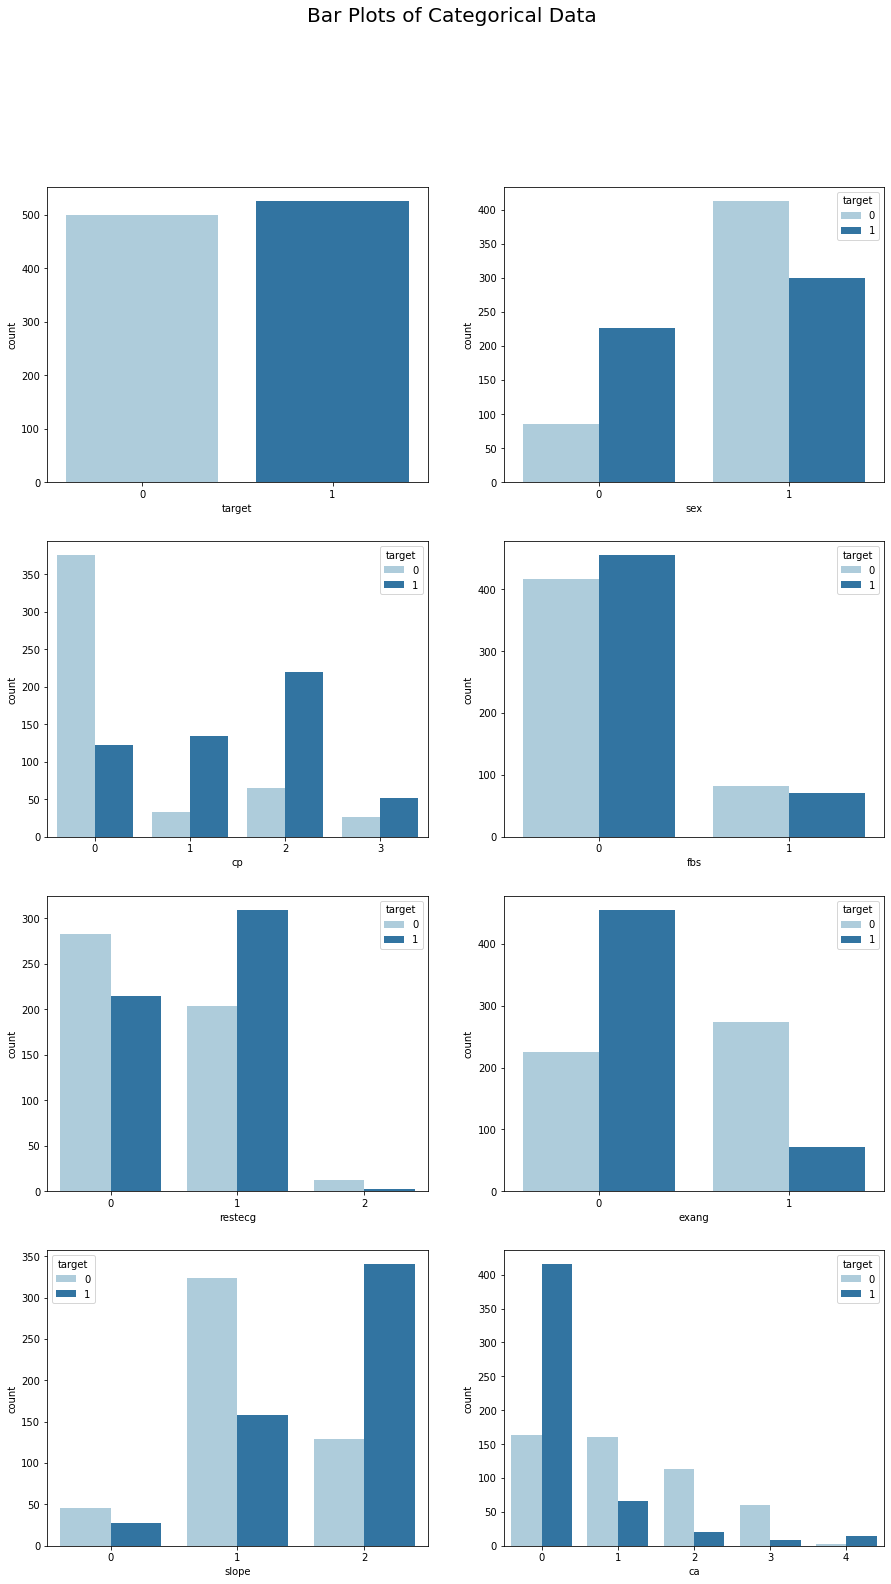

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
fig.suptitle('Bar Plots of Categorical Data', fontsize=20)

def plot_cats(df, cols, target, ax):
    pos = 1
    sns.countplot(x=target, data=df, ax=ax[0, 0])
    sns.countplot(x=cols[0], hue=target, data=df, ax=ax[0, 1])
    for i in range(1, ax.shape[0]):
        for j in range(ax.shape[1]):
            sns.countplot(x=cols[pos], hue=target, data=df, ax=ax[i, j])
            pos += 1
            
    plt.show()      
        
plot_cats(df, categorial_columns, 'target', ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

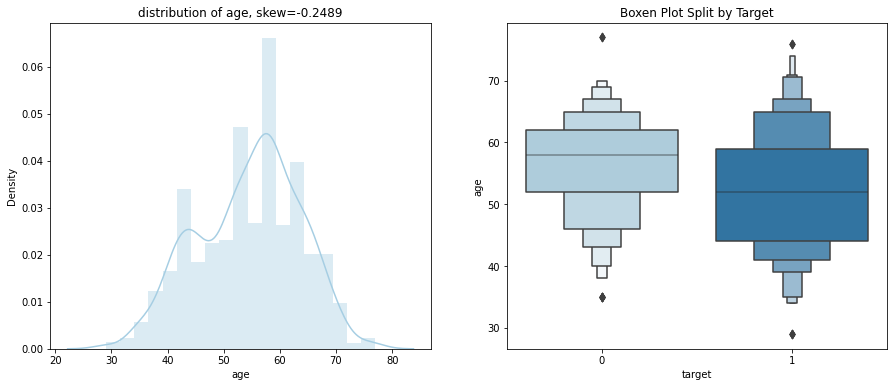

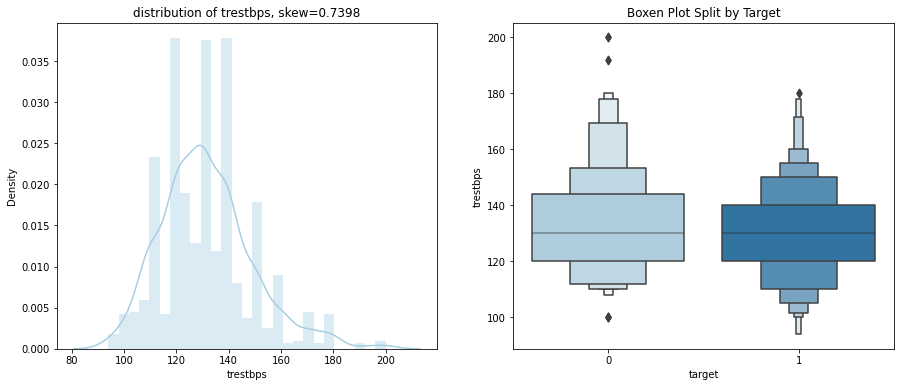

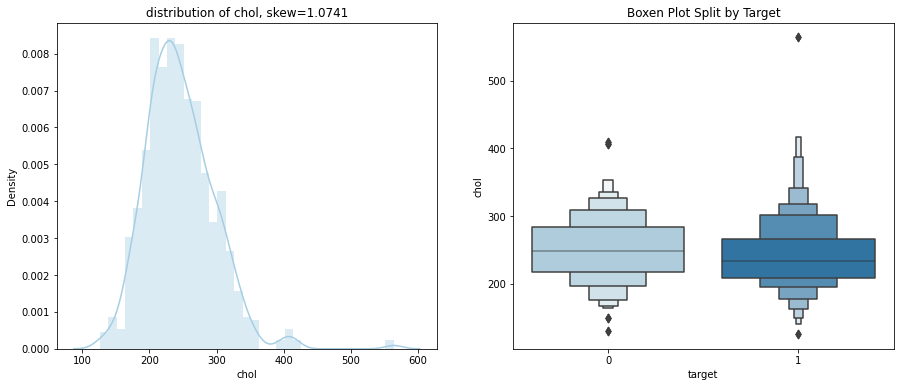

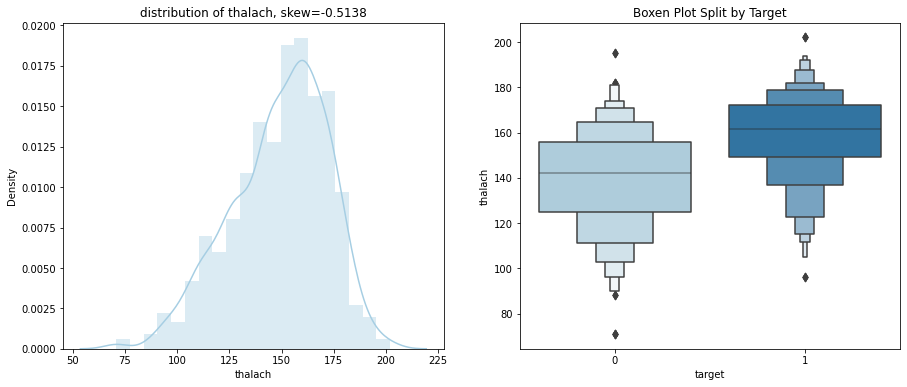

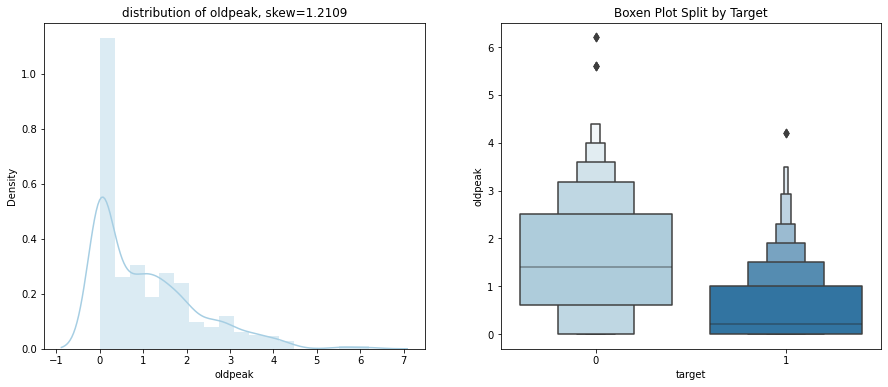

In [ ]:
def plot_numeric(df, cols, target):
    for col in cols:
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        sns.distplot(a=df[col], ax=ax[0])
        ax[0].set_title('distribution of {}, skew={:.4f}'.format(col, df[col].skew()))
        sns.boxenplot(data=df, x=target, y=col, ax=ax[1])
        ax[1].set_title('Boxen Plot Split by Target')
    plt.show()
        
plot_numeric(df, numerical_columns, 'target')

In [ ]:
#making a copy of the data
df_rf = df.copy()

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
df_rf[['oldpeak']] = PowerTransformer(method='yeo-johnson').fit_transform(df_rf[['oldpeak']])
df_rf[['age', 'trestbps', 'chol', 'thalach']] = StandardScaler().fit_transform(df_rf[['age', 'trestbps', 'chol', 'thalach']])

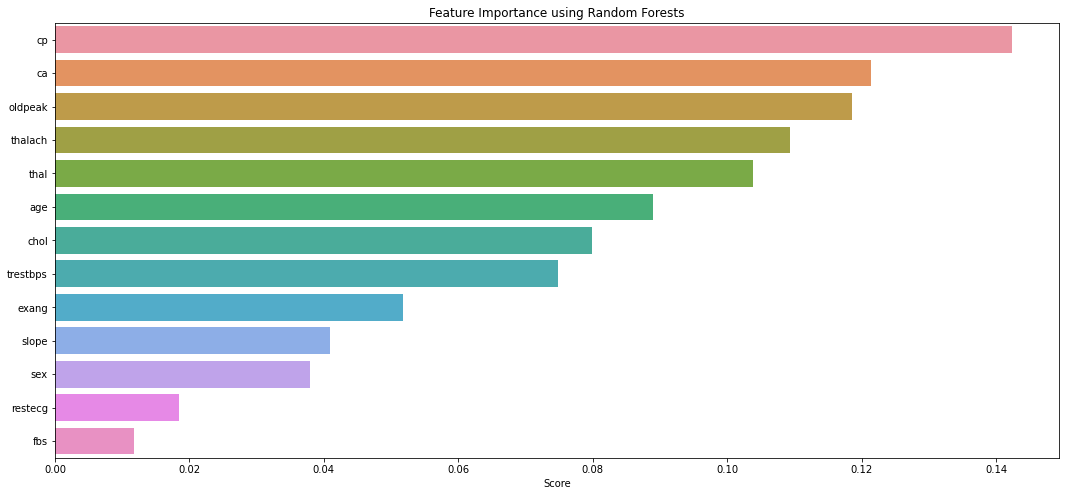

In [ ]:
#feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(df_rf[df_rf.columns[:-1]].values, df_rf['target'].values)

fig = plt.figure(figsize=(18, 8))
importance = pd.Series(rf.feature_importances_, index=df_rf.columns[:-1]).sort_values(ascending=False)
sns.barplot(x=importance, y=importance.index)
plt.title('Feature Importance using Random Forests')
plt.xlabel('Score')
plt.show()

In [ ]:
#modelling
df_rf2 = df.copy()

In [ ]:
X = df_rf2.drop('target',1)
y = df_rf2['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1025, 13) (1025,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)


In [ ]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth =5) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 0.9402439024390243
Testing Score: 0.9512195121951219
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.551219512195122
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


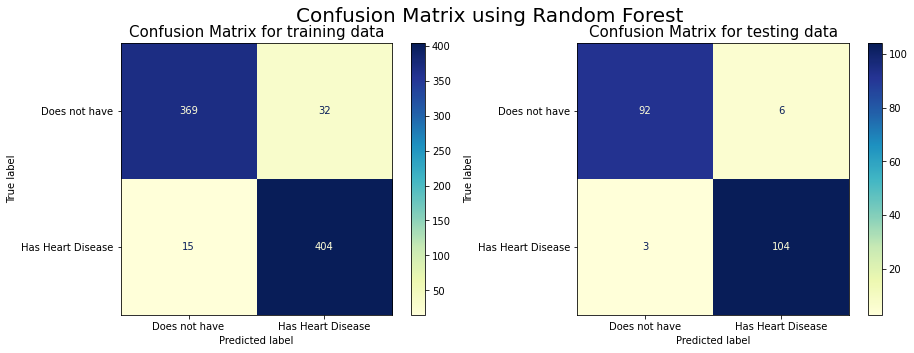

In [ ]:
plotConfusionMatrixFunction('Confusion Matrix using Random Forest ', model,X_train,y_train)

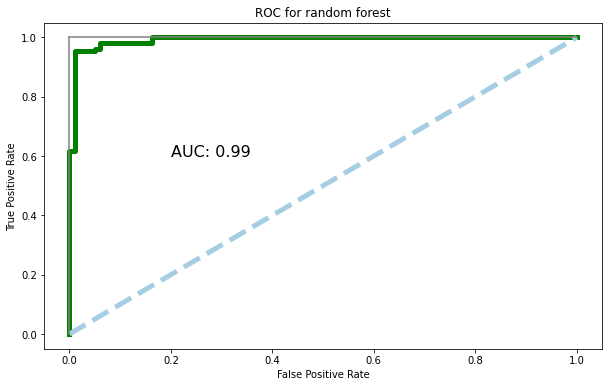

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#https://www.kaggle.com/code/alexander85/heart-disease-adaboost-w-different-base-estimators

# **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model = abc.fit(X_train, y_train)

In [ ]:
y_pred_adaboost = model.predict(X_test)
print(y_pred_adaboost)

[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_adaboost))

AdaBoost Classifier Model Accuracy: 0.8926829268292683


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


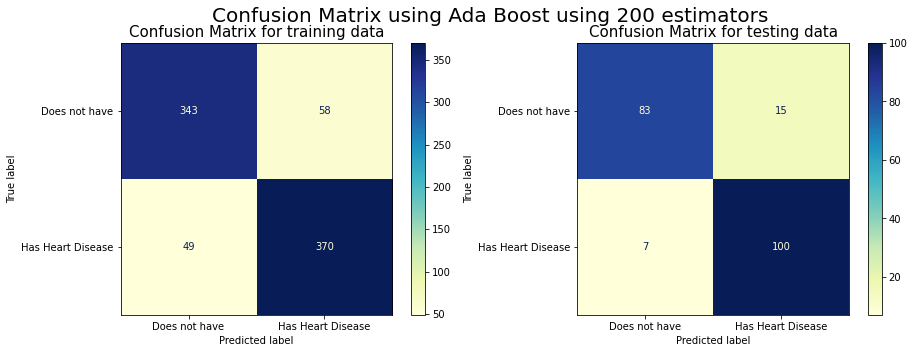

In [ ]:
plotConfusionMatrixFunction('Confusion Matrix using Ada Boost using 200 estimators ', abc, X_train,y_train)

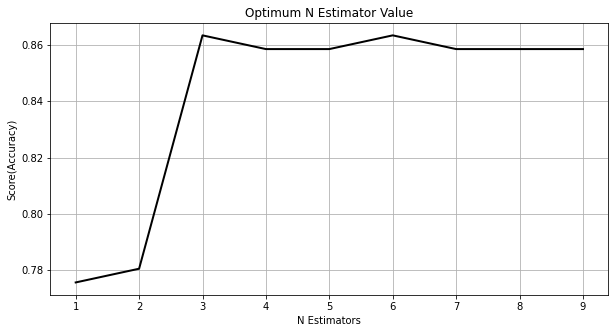

In [ ]:
scores = []
for each in range(1,10):
    ada = AdaBoostClassifier(n_estimators = each,random_state=0)
    ada.fit(X_train,y_train)
    scores.append(ada.score(X_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,10),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

In [ ]:
ada = AdaBoostClassifier(n_estimators=3,random_state=0,learning_rate=0.05)
ada.fit(X_train,y_train) # learning
Adascore=ada.score(X_test,y_test)

print("AdaBoost Test Score: ",ada.score(X_test,y_test))
print("AdaBoost Train Score: ",ada.score(X_train,y_train))

AdaBoost Test Score:  0.775609756097561
AdaBoost Train Score:  0.7560975609756098


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


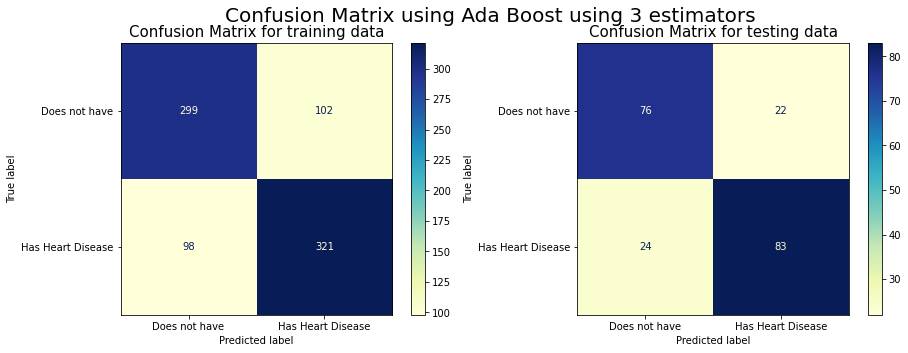

In [ ]:
plotConfusionMatrixFunction('Confusion Matrix using Ada Boost using 3 estimators ', ada,X_train,y_train)

In [ ]:
ada = AdaBoostClassifier(base_estimator = model, n_estimators=200, random_state=0,learning_rate=0.05)
ada.fit(X_train,y_train) # learning
Adascore=ada.score(X_test,y_test)

print("AdaBoost Test Score: ",ada.score(X_test,y_test))
print("AdaBoost Train Score: ",ada.score(X_train,y_train))

AdaBoost Test Score:  0.9804878048780488
AdaBoost Train Score:  0.9878048780487805


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


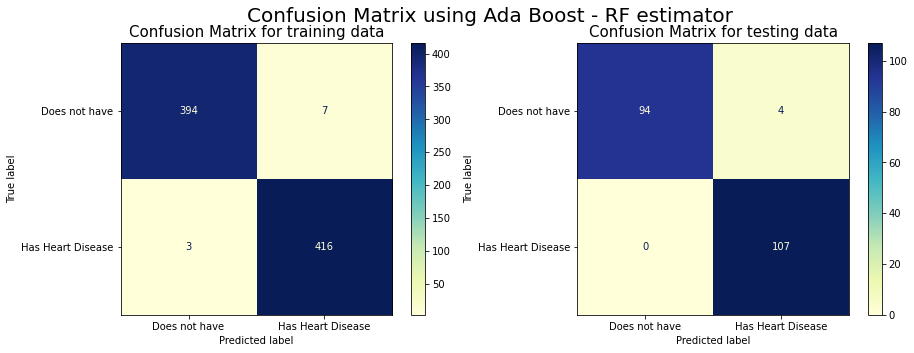

In [ ]:
plotConfusionMatrixFunction('Confusion Matrix using Ada Boost - RF estimator ', ada,X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



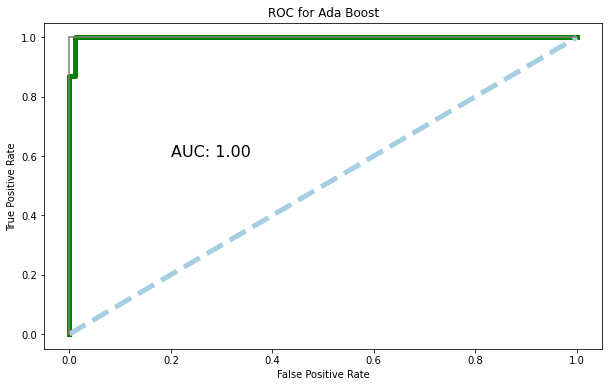

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = ada.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Ada Boost')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()